In [2]:
#!/usr/bin/python

# This is a python2 program

"""
This program takes a list of relative probabilities or frequencies on the
command-line and uses these to construct an optimal binary symbol code with
the Huffman algorithm.

These commands produce the same code:
    python huffman.py 0.1 0.2 0.7
    python huffman.py 100 200 700

This program is written for teaching purposes, and outputs the codes as
human-readable strings rather than packing bits into binary files.
Provided to help explore the results of the Huffman algorithm, not a
demonstration of how to write code!

It is currently left as an exercise for the reader to actually encode and decode
files with the generated symbol code. You could also look at David MacKay's
demonstrations of several compression algorithms:
    http://www.inference.phy.cam.ac.uk/mackay/python/compress/

Iain Murray, October 2011.
"""

INF = 1e999

def min_argmin(array):
    """Returns the minimum element of an array, and its index."""
    mn = min(array)
    return (mn, array.index(mn))

def huffman(probs):
    """Return Huffman codewords for the given probability distribution."""
    nodes = [[x] for x in range(len(probs))]
    merged_probs = probs[:]
    while len(nodes) > 1:
        # find two least probable nodes:
        (mn, idx) = min_argmin(merged_probs)
        merged_probs[idx] = INF
        (mn2, idx2) = min_argmin(merged_probs)
        # merge them:
        merged_probs[idx] = mn + mn2;
        del merged_probs[idx2]
        nodes[idx] = [nodes[idx], nodes[idx2]]
        del nodes[idx2]

    # Recursive navigation of tree of nested lists to construct codes
    def huffman_helper(cur_code, nodes, codes):
        if len(nodes) == 1:
            symbol = nodes[0]
            codes[symbol] = cur_code
        else:
            huffman_helper(cur_code + '0', nodes[0], codes)
            huffman_helper(cur_code + '1', nodes[1], codes)
    codes = ['' for x in range(len(probs))]
    huffman_helper('', nodes[0], codes)
    return codes
    
def symbol_code_expected_length(probs, codes):
    return sum(x*len(y) for (x,y) in zip(probs, codes))

def Hbits(probs):
    """Entropy of discrete distribution, measured in bits."""
    from math import log
    return sum(-x*log(x, 2) for x in probs if x !=0)

a=[10, 20, 30, 100]
probs = map(float, a)
Z = sum(probs)
probs = [x/Z for x in probs]
codes = huffman(probs)
Lbar = symbol_code_expected_length(probs, codes)
print 'Codewords:'
print '----------'
for cc in codes:
    print cc
print '----------'
print 'Expected length: %g bits/symbol' % Lbar
print 'Entropy of dist: %g bits/symbol' % Hbits(probs)




Codewords:
----------
000
001
01
1
----------
Expected length: 1.5625 bits/symbol
Entropy of dist: 1.50161 bits/symbol


In [3]:
%matplotlib inline
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time



# os.system("cd $CAFFE_ROOT")
caffe_root = os.environ["CAFFE_ROOT"]
os.chdir(caffe_root)
print caffe_root
sys.path.insert(0, caffe_root + 'python')
import caffe

/home/songhan/pruning/


In [4]:
caffe.set_mode_gpu()
caffe.set_device(1)
prototxt = '3_prototxt_solver/L2/train_val.prototxt'
caffemodel = '4_model_checkpoint/alexnet/alexnet9x.caffemodel'
net = caffe.Net(prototxt, caffemodel, caffe.TEST)

In [5]:
choice = [8,5,4]
layers = filter(lambda x:'conv' in x or 'fc' in x or 'ip' in x, net.params.keys())
params_bits = [choice[0]] * (len(layers) - 3) + [choice[1]] * 3
location_bits = [choice[2]] * len(layers)
print layers
print params_bits
print location_bits


['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8']
[8, 8, 8, 8, 8, 5, 5, 5]
[4, 4, 4, 4, 4, 4, 4, 4]


Layer: conv1
29451
29453
1 16


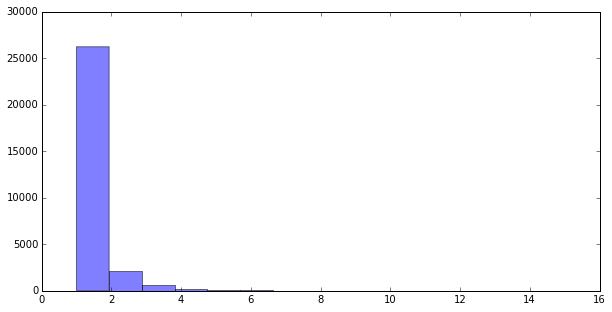

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
----------
Expected length: 1.18266 bits/symbol
Entropy of dist: 0.67079 bits/symbol
storaged bits required =  19756.7894493
Layer: conv2
116406
118826
0 16


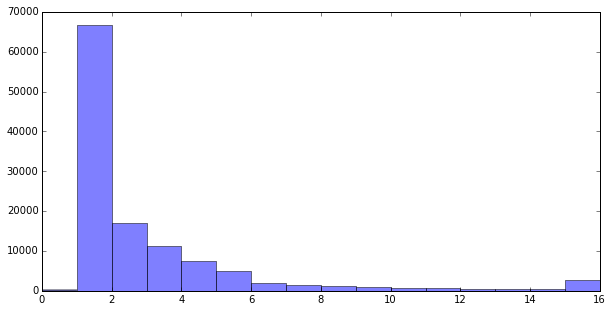

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
----------
Expected length: 2.27466 bits/symbol
Entropy of dist: 2.24761 bits/symbol
storaged bits required =  267075.011265
Layer: conv3
306235
310219
0 16


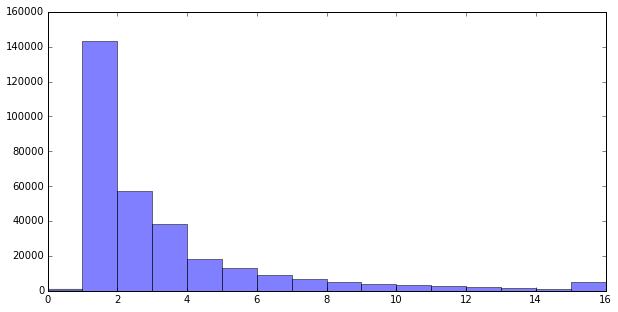

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
----------
Expected length: 2.57817 bits/symbol
Entropy of dist: 2.54862 bits/symbol
storaged bits required =  790630.313467
Layer: conv4
247138
248383
0 16


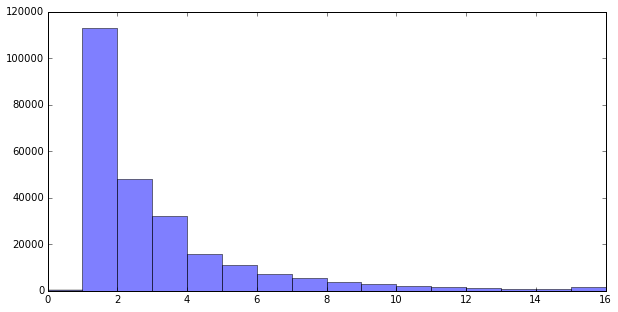

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
----------
Expected length: 2.52877 bits/symbol
Entropy of dist: 2.49362 bits/symbol
storaged bits required =  619372.310291
Layer: conv5
163149
164257
0 16


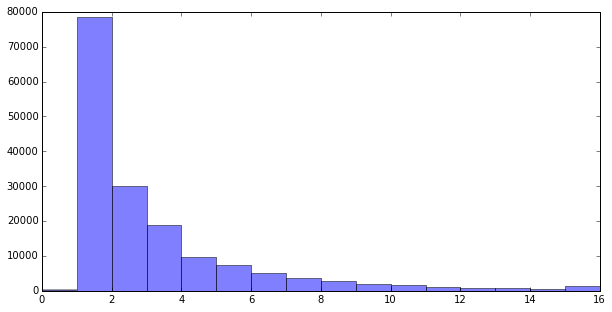

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
----------
Expected length: 2.50602 bits/symbol
Entropy of dist: 2.47868 bits/symbol
storaged bits required =  407140.864786
Layer: fc6
3339036
4736222
0 16


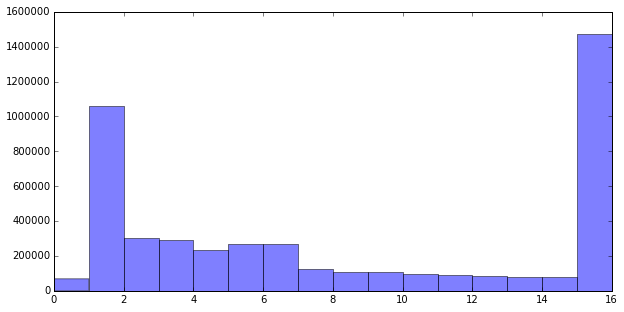

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
----------
Expected length: 3.15299 bits/symbol
Entropy of dist: 3.12939 bits/symbol
storaged bits required =  14821489.373
Layer: fc7
1537775
2002075
0 16


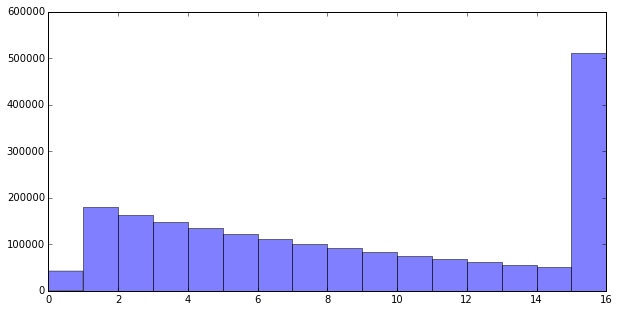

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
----------
Expected length: 3.58879 bits/symbol
Entropy of dist: 3.56503 bits/symbol
storaged bits required =  7137448.58058
Layer: fc8
1051263
1065196
0 16


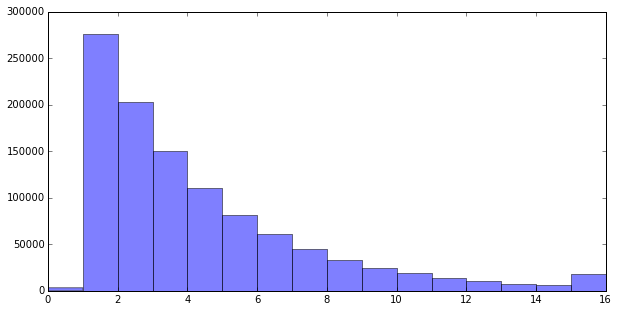

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
----------
Expected length: 3.17877 bits/symbol
Entropy of dist: 3.14508 bits/symbol
storaged bits required =  3350129.27993
total_non_Humman 34698524
total_Humman 27413042.5228
average bits 3.16013932152
compress ratio 0.790034830381


In [6]:
assert len(layers) == len(params_bits)
assert len(location_bits) == len(layers)
num_ori = 0
num_new = 0
total_extra_slots = 0
total_non_zeros = 0
total_param_num = 0
# Parameters and locations bits
total_Humman = 0
total_non_Humman = 0
total_distance_clipped = 0
for idx, layer in enumerate(layers):
    print "Layer:", layer
    num_ori += net.params[layer][0].data.size * 32
    num_ori += net.params[layer][1].data.size * 32
    max_length = 2 ** location_bits[idx]

    non_zeros_loc = np.where(net.params[layer][0].data.flatten() != 0.0)[0]
    distance_loc = non_zeros_loc[1:] - non_zeros_loc[:-1]
    


    
    extra_slots = np.sum(np.floor(distance_loc / max_length))
    distance_clipped = np.mod(distance_loc, max_length)
    distance_clipped = np.append(distance_clipped, [max_length]*extra_slots)
    print distance_loc.size
    print distance_clipped.size    


    numBins=2**choice[2]
    print  np.min(distance_clipped), np.max(distance_clipped)
    plt.figure(figsize=(10,5))  
    plt.hist(distance_clipped, numBins, color='blue', alpha=0.5) 
    plt.show() 

    probs = map(float, distance_clipped)
    Z = sum(probs)
    probs, bins = np.histogram(probs, bins=1+np.arange(2**choice[2]),density=True)
    print bins
    codes = huffman(list(probs))
    Lbar = symbol_code_expected_length(probs, codes)
    print '----------'
    print 'Expected length: %g bits/symbol' % Lbar
    print 'Entropy of dist: %g bits/symbol' % Hbits(probs)
    print 'storaged bits required = ', Hbits(probs)*distance_clipped.size
    total_Humman += Hbits(probs)*distance_clipped.size
    total_non_Humman += location_bits[idx]*distance_clipped.size
    total_distance_clipped += distance_clipped.size
    
#     extra_slots = np.sum(np.floor(distance_loc / max_length))
#     non_zeros = np.count_nonzero(net.params[layer][0].data)

#     total_extra_slots += extra_slots
#     total_non_zeros += non_zeros
#     num_new +=(non_zeros+ extra_slots) * (params_bits[idx] + location_bits[idx])
#     total_param_num += (non_zeros+ extra_slots) * params_bits[idx]
#     num_new += net.params[layer][1].data.size * 32

    
#     print "Extra slots:", extra_slots
#     print "Non-zeros:", non_zeros
#     print "Extra slots rate", float(extra_slots) / non_zeros
#     print "====================================="


# print "total extra slots ratio:"
# extra_ratio = float(total_extra_slots) / (total_non_zeros + total_extra_slots)
# print extra_ratio

# # Codebooks
# ndlist = np.array(params_bits)
# codebook_size = 32 * np.sum(2 ** ndlist)
# num_new += codebook_size

# comp_rate = float(num_new) / num_ori
# codebook_ratio = float(codebook_size) / num_new
# params_ratio = float(total_param_num) / num_new
# loc_ratio = 1 - codebook_ratio - params_ratio
print "total_non_Humman", total_non_Humman
print "total_Humman", total_Humman
print "average bits", total_Humman/total_distance_clipped
print "compress ratio", total_Humman/total_distance_clipped/choice[2]